# Best 5 Seconds

## SNR

Best 5-second segment starts at: 7.70 seconds with SNR: 0.00


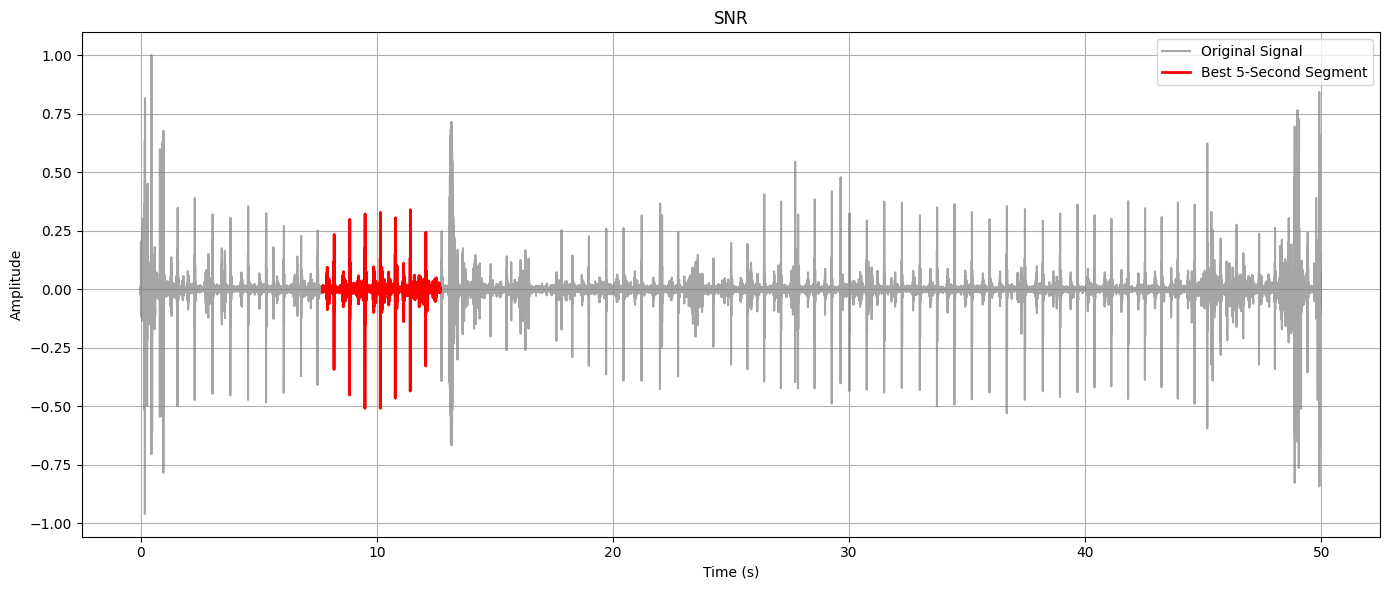

In [ ]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

audio_path = '/content/drive/MyDrive/2024-2025/ELEC 594/pcg_recordings/50048_MV.wav'
y, sr = librosa.load(audio_path, sr=None)

window_length = 5 * sr  # 5 seconds window
step_size = 0.1 * sr  # 0.1 seconds step size

# Define a function to compute the SNR
def compute_snr(signal):
    signal_power = np.mean(signal ** 2)
    noise_power = np.var(signal)
    return 10 * np.log10(signal_power / noise_power)

# Rolling window to find the best 5-second segment
best_segment = None
best_snr = -np.inf
best_start_index = 0

for start in range(0, len(y) - window_length, int(step_size)):
    # Extract the current window
    window = y[start:start + window_length]

    # Calculate the SNR
    current_snr = compute_snr(window)

    # Track the best SNR and corresponding window
    if current_snr > best_snr:
        best_snr = current_snr
        best_segment = window
        best_start_index = start

# Calculate the time for the best segment
best_segment_time = best_start_index / sr
print(f"Best 5-second segment starts at: {best_segment_time:.2f} seconds with SNR: {best_snr:.2f}")

# Plot the original signal and highlight the best 5-second segment
time_axis = np.linspace(0, len(y) / sr, len(y))
segment_time_axis = np.linspace(best_start_index / sr, (best_start_index + window_length) / sr, len(best_segment))

plt.figure(figsize=(14, 6))
plt.plot(time_axis, y, label='Original Signal', color='gray', alpha=0.7)
plt.plot(segment_time_axis, best_segment, label='Best 5-Second Segment', color='red', linewidth=2)
plt.title('SNR')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Energy

Best 5-second segment starts at: 0.00 seconds with Energy: 78.32


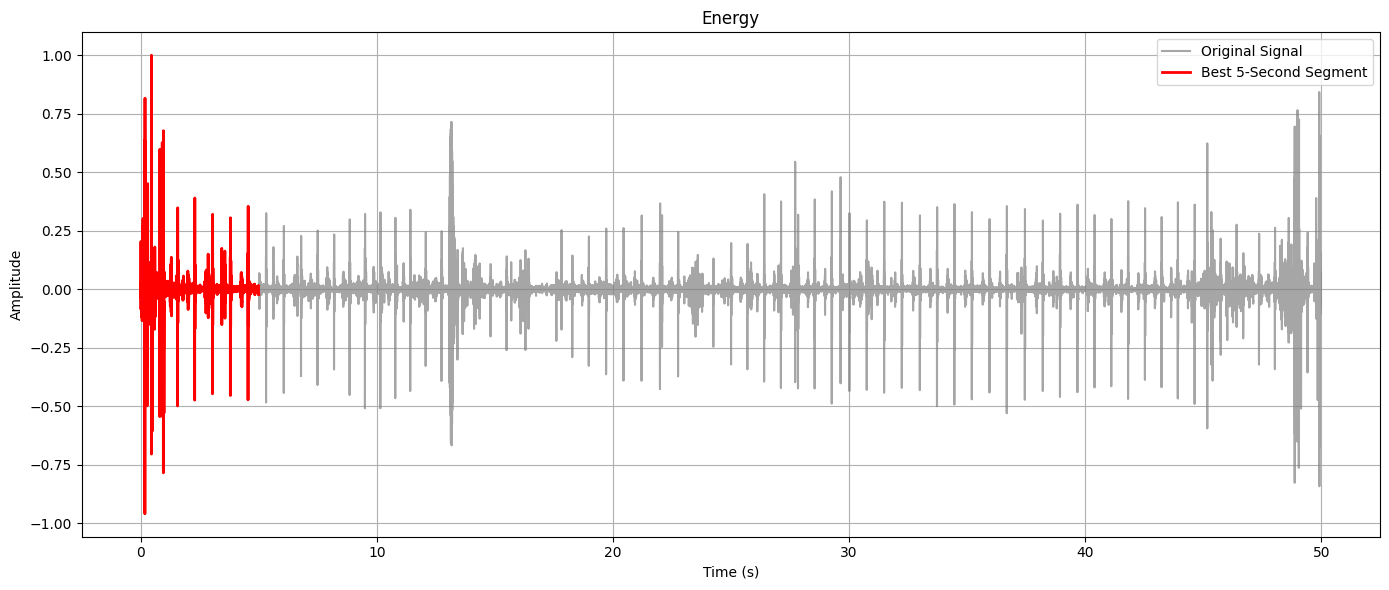

In [ ]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

audio_path = '/content/drive/MyDrive/2024-2025/ELEC 594/pcg_recordings/50048_MV.wav'
y, sr = librosa.load(audio_path, sr=None)

# Parameters
window_length = 5 * sr  # 5 seconds window
step_size = int(0.1 * sr)  # 0.1 seconds step size

# Function to compute the energy of a signal
def compute_energy(signal):
    return np.sum(signal ** 2)  # Energy = sum of squared amplitudes

# Rolling window to find the best 5-second segment
best_segment = None
best_energy = -np.inf
best_start_index = 0

for start in range(0, len(y) - window_length, step_size):
    # Extract the current window
    window = y[start:start + window_length]

    # Compute the energy of the current window
    current_energy = compute_energy(window)

    # Track the best energy and corresponding window
    if current_energy > best_energy:
        best_energy = current_energy
        best_segment = window
        best_start_index = start

# Calculate the time for the best segment
best_segment_time = best_start_index / sr
print(f"Best 5-second segment starts at: {best_segment_time:.2f} seconds with Energy: {best_energy:.2f}")

time_axis = np.linspace(0, len(y) / sr, len(y))
segment_time_axis = np.linspace(best_start_index / sr, (best_start_index + window_length) / sr, len(best_segment))

plt.figure(figsize=(14, 6))
plt.plot(time_axis, y, label='Original Signal', color='gray', alpha=0.7)
plt.plot(segment_time_axis, best_segment, label='Best 5-Second Segment', color='red', linewidth=2)
plt.title('Energy')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## Zero Crossing Rate

Best 5-second segment starts at: 18.00 seconds with ZCR: 0.0882


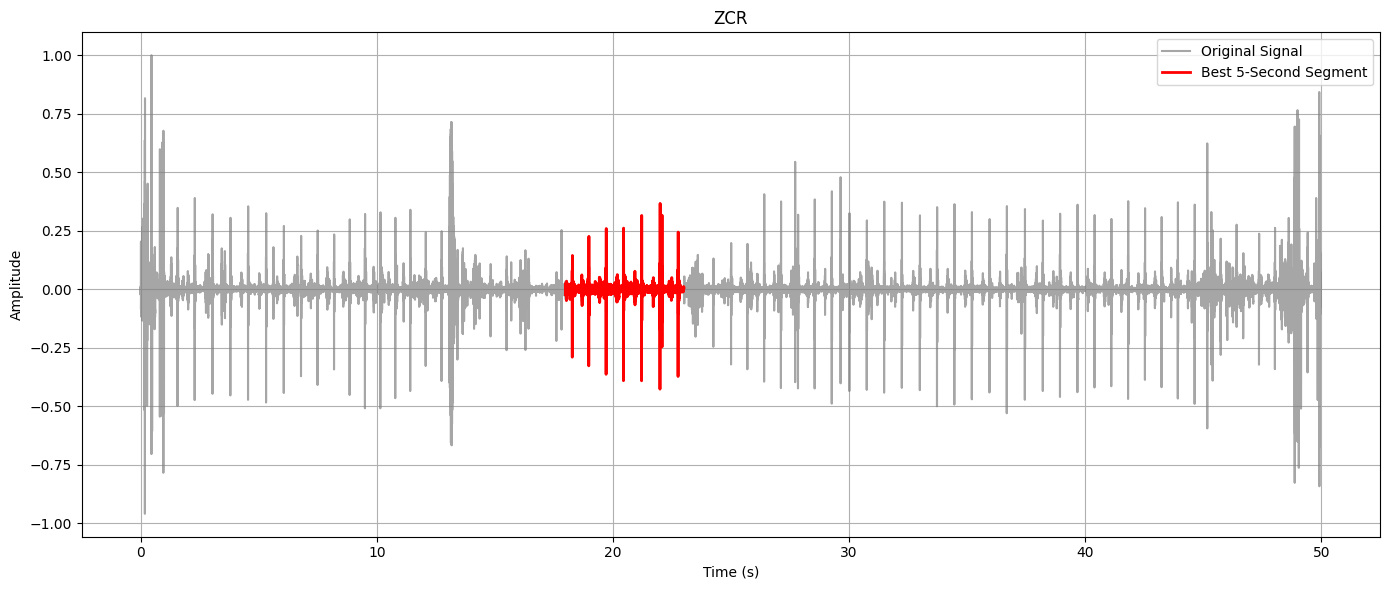

In [ ]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
e
audio_path = '/content/drive/MyDrive/2024-2025/ELEC 594/pcg_recordings/50048_MV.wav'
y, sr = librosa.load(audio_path, sr=None)

# Parameters
window_length = 5 * sr  # 5 seconds window
step_size = int(0.1 * sr)  # 0.1 seconds step size

# Function to compute the zero-crossing rate of a signal
def compute_zcr(signal):
    return np.mean(librosa.zero_crossings(signal, pad=False))

# Rolling window to find the best 5-second segment based on ZCR
best_segment = None
lowest_zcr = np.inf
best_start_index = 0

for start in range(0, len(y) - window_length, step_size):
    # Extract the current window
    window = y[start:start + window_length]

    # Compute the ZCR of the current window
    current_zcr = compute_zcr(window)

    # Track the lowest ZCR and corresponding window
    if current_zcr < lowest_zcr:
        lowest_zcr = current_zcr
        best_segment = window
        best_start_index = start

# Calculate the time for the best segment
best_segment_time = best_start_index / sr
print(f"Best 5-second segment starts at: {best_segment_time:.2f} seconds with ZCR: {lowest_zcr:.4f}")

# Plot the original signal and highlight the best 5-second segment
time_axis = np.linspace(0, len(y) / sr, len(y))
segment_time_axis = np.linspace(best_start_index / sr, (best_start_index + window_length) / sr, len(best_segment))

plt.figure(figsize=(14, 6))
plt.plot(time_axis, y, label='Original Signal', color='gray', alpha=0.7)
plt.plot(segment_time_axis, best_segment, label='Best 5-Second Segment', color='red', linewidth=2)
plt.title('ZCR')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Spectral Flatness

Best 5-second segment starts at: 38.80 seconds with Spectral Flatness: 0.0056


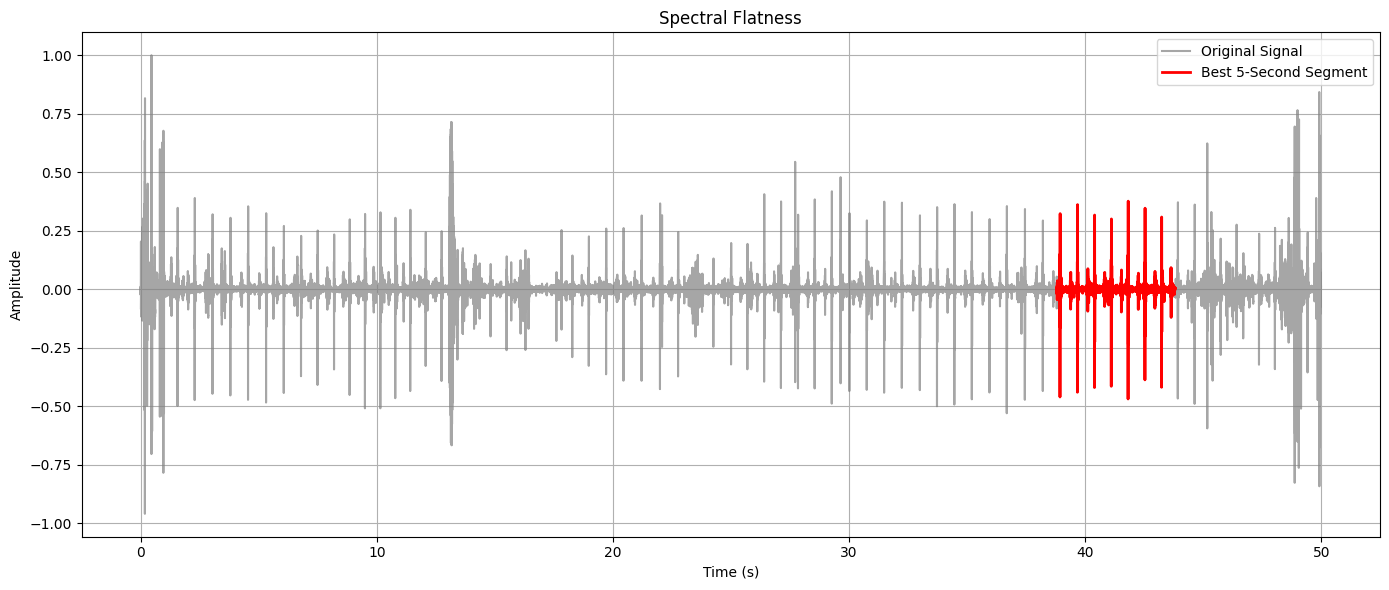

In [ ]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

audio_path = '/content/drive/MyDrive/2024-2025/ELEC 594/pcg_recordings/50048_MV.wav'
y, sr = librosa.load(audio_path, sr=None)

# Parameters
window_length = 5 * sr  # 5 seconds window
step_size = int(0.1 * sr)  # 0.1 seconds step size

# Function to compute the spectral flatness of a signal
def compute_spectral_flatness(signal, sr):
    S = np.abs(librosa.stft(signal))
    return np.mean(librosa.feature.spectral_flatness(S=S))

# Rolling window to find the best 5-second segment based on Spectral Flatness
best_segment = None
lowest_flatness = np.inf
best_start_index = 0

for start in range(0, len(y) - window_length, step_size):
    # Extract the current window
    window = y[start:start + window_length]

    # Compute the spectral flatness of the current window
    current_flatness = compute_spectral_flatness(window, sr)

    # Track the lowest spectral flatness and corresponding window
    if current_flatness < lowest_flatness:
        lowest_flatness = current_flatness
        best_segment = window
        best_start_index = start

# Calculate the time for the best segment
best_segment_time = best_start_index / sr
print(f"Best 5-second segment starts at: {best_segment_time:.2f} seconds with Spectral Flatness: {lowest_flatness:.4f}")

# Plot the original signal and highlight the best 5-second segment
time_axis = np.linspace(0, len(y) / sr, len(y))
segment_time_axis = np.linspace(best_start_index / sr, (best_start_index + window_length) / sr, len(best_segment))

plt.figure(figsize=(14, 6))
plt.plot(time_axis, y, label='Original Signal', color='gray', alpha=0.7)
plt.plot(segment_time_axis, best_segment, label='Best 5-Second Segment', color='red', linewidth=2)
plt.title('Spectral Flatness')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Spike Removal & Degree of Periodicity

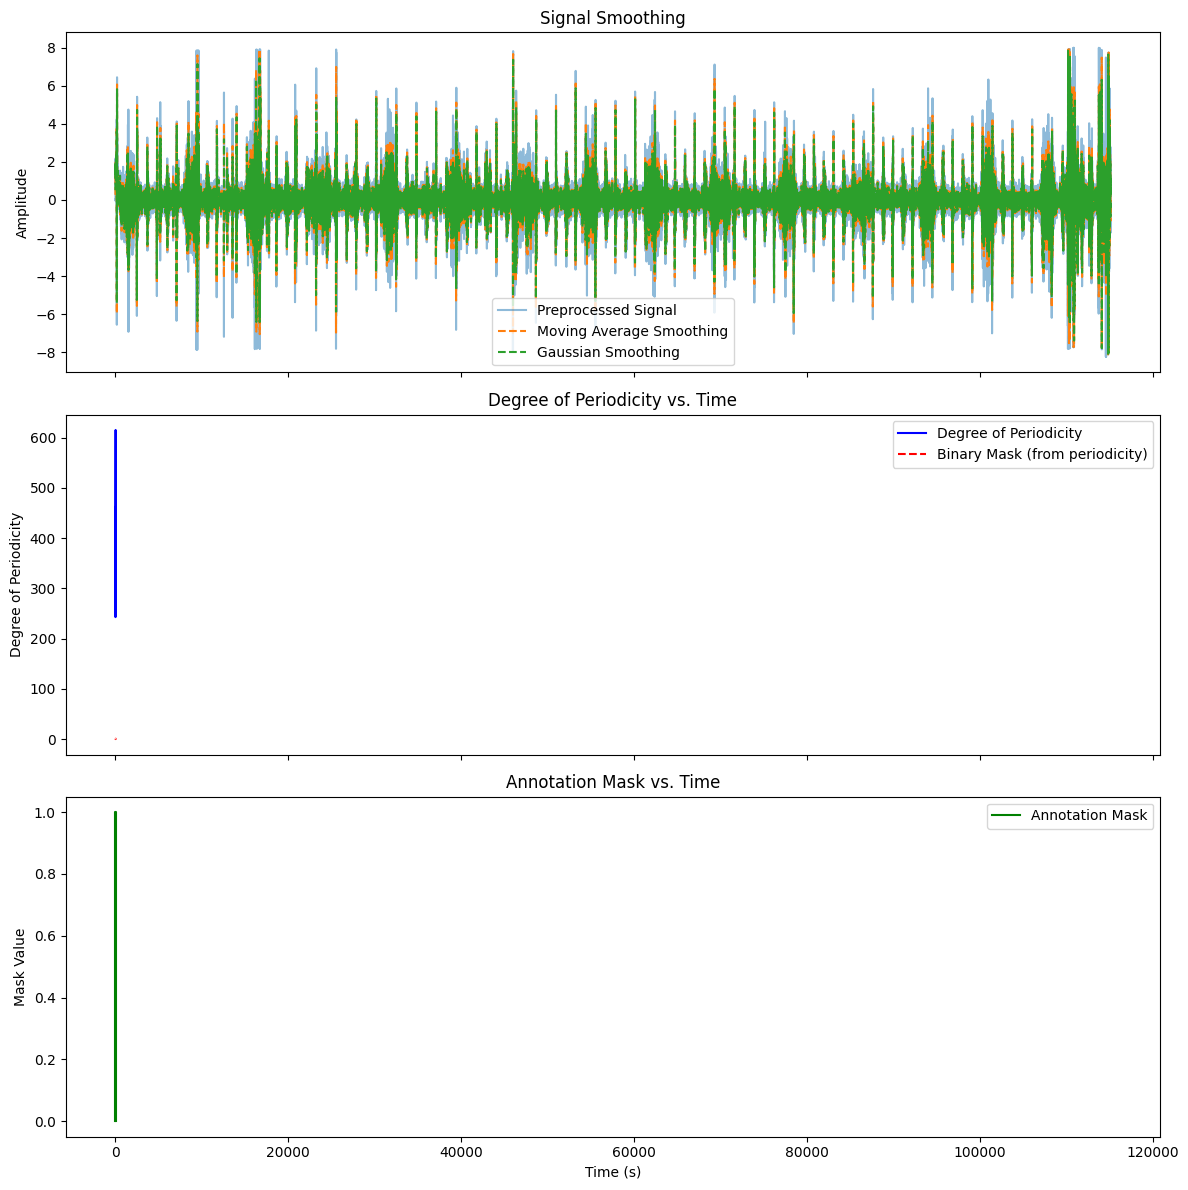

In [ ]:
import numpy as np
import soundfile as sf
from scipy.io import wavfile
from scipy.signal import hilbert, butter, filtfilt
from scipy.ndimage import gaussian_filter1d
import matplotlib.pyplot as plt

# Function to remove spikes from a signal
def remove_spike(input_signal):
    R = 3
    dspike_signal = np.copy(input_signal)
    abs_signal = np.abs(input_signal)
    sort_abs = np.sort(abs_signal)[::-1]
    TH = np.mean(sort_abs[:int(len(input_signal) * 0.1)])
    ind_spike = np.where(abs_signal > R * TH)[0]

    if len(ind_spike) > 0:
        L_one_percent = int(len(input_signal) * 0.01)
        if len(ind_spike) > L_one_percent:
            ampi = np.argsort(abs_signal[ind_spike])[::-1]
            dspike_signal[ind_spike[ampi[:L_one_percent]]] = np.sign(input_signal[ind_spike[ampi[:L_one_percent]]]) * R * TH
        else:
            dspike_signal[ind_spike] = np.sign(input_signal[ind_spike]) * R * TH
    return dspike_signal

# Function for signal pre-processing
def pre_processing(input_signal, fs):
    input_signal = input_signal / np.std(input_signal)
    dspike_signal = remove_spike(input_signal)
    fc = 2
    b, a = butter(3, 2 * fc / fs, 'high')
    dwander = filtfilt(b, a, dspike_signal)
    output_signal = dwander / np.std(dwander)
    return output_signal

# Function to apply moving average smoothing
def moving_average_smoothing(signal, window_size):
    window = np.ones(window_size) / window_size
    smoothed_signal = np.convolve(signal, window, mode='same')
    return smoothed_signal

# Function to apply Gaussian smoothing
def gaussian_smoothing(signal, sigma):
    smoothed_signal = gaussian_filter1d(signal, sigma=sigma)
    return smoothed_signal

# Function to compute the degree of periodicity
def getDegree_cycle(rx, Min_cf, Max_cf, fs):
    sz = len(rx)
    M = int(2e2)
    g = np.zeros((sz, M), dtype=np.complex128)

    for m in range(M):
        if m == 0: continue
        kk = np.arange(-sz + 1, sz)
        ww = np.exp(-1j * 2 * np.pi * (Max_cf - Min_cf) * m / (M * fs)) ** (kk**2 / 2)
        x = np.abs(hilbert(rx)) ** 2
        x = np.sqrt(np.maximum(x - np.mean(x), 0))
        nn = np.arange(sz)
        aa = np.exp(1j * 2 * np.pi * Min_cf * m / fs) ** nn
        aa = aa * ww[:sz]
        y = x * aa
        g[:, m] = np.convolve(y, 1 / ww[:sz], mode='valid') * ww[M-1:M+sz-1]

    g_vector = np.abs(g).sum(axis=0)[:M]
    degree_peak = np.max(g_vector) / np.median(g_vector)
    cycle_freq = np.linspace(Min_cf, Max_cf, len(g))
    return degree_peak, g, cycle_freq

# Sliding window approach for periodicity detection
def getDegree_cycle_sliding_window(rx, Min_cf, Max_cf, fs, window_size, overlap):
    sz = len(rx)
    window_size = int(window_size * fs)
    step_size = int(window_size * (1 - overlap))

    degree_peak_values = []
    time_values = []

    for start in range(0, sz - window_size + 1, step_size):
        end = start + window_size
        windowed_signal = rx[start:end]
        degree_peak, _, _ = getDegree_cycle(windowed_signal, Min_cf, Max_cf, fs)
        center_time = (start + end) / (2.0 * fs)

        degree_peak_values.append(degree_peak)
        time_values.append(center_time)

    return degree_peak_values, time_values

file_path = '/content/drive/MyDrive/2024-2025/ELEC 594/Audio Dataset/training_data/13918_MV.wav'
tsv_file_path = '/content/drive/MyDrive/2024-2025/ELEC 594/Audio Dataset/training_data/13918_MV.tsv'

fs, signal = wavfile.read(file_path)
phs = pre_processing(signal, fs)

# Apply smoothing to the preprocessed signal
window_size = 5
smoothed_signal_ma = moving_average_smoothing(phs, window_size)

sigma = 2
smoothed_signal_gaussian = gaussian_smoothing(phs, sigma)

# Sliding window analysis parameters
Min_cf = 0.0
Max_cf = 2.0
window_size = 8.0
overlap = 0.98

degree_peak_values, time_values = getDegree_cycle_sliding_window(smoothed_signal_gaussian, Min_cf, Max_cf, fs, window_size, overlap)

# Dynamic thresholding based on mean and standard deviation
mean_peak = np.mean(degree_peak_values)
std_peak = np.std(degree_peak_values)
threshold = mean_peak + 0.5 * std_peak

binary_mask = (degree_peak_values >= threshold).astype(int)

# Read the annotation file
data = np.genfromtxt(tsv_file_path, delimiter='\t')
start_time = data[:, 0]
end_time = data[:, 1]
noise_column = data[:, 2]
mask = (noise_column != 0).astype(int)

fig, ax = plt.subplots(3, 1, figsize=(12, 12), sharex=True)
ax[0].plot(phs, label='Preprocessed Signal', alpha=0.5)
ax[0].plot(smoothed_signal_ma, label='Moving Average Smoothing', linestyle='--')
ax[0].plot(smoothed_signal_gaussian, label='Gaussian Smoothing', linestyle='--')
ax[0].set_title('Signal Smoothing')
ax[0].set_ylabel('Amplitude')
ax[0].legend()
ax[1].plot(time_values, degree_peak_values, label='Degree of Periodicity', color='b')
ax[1].plot(time_values, binary_mask, label='Binary Mask (from periodicity)', color='r', linestyle='--')
ax[1].set_title('Degree of Periodicity vs. Time')
ax[1].set_ylabel('Degree of Periodicity')
ax[1].legend()
time_points = np.sort(np.concatenate([start_time, end_time]))
mask_values = np.repeat(mask, 2)
ax[2].plot(time_points, mask_values, label='Annotation Mask', color='g')
ax[2].set_title('Annotation Mask vs. Time')
ax[2].set_xlabel('Time (s)')
ax[2].set_ylabel('Mask Value')
ax[2].legend()

plt.tight_layout()
plt.show()


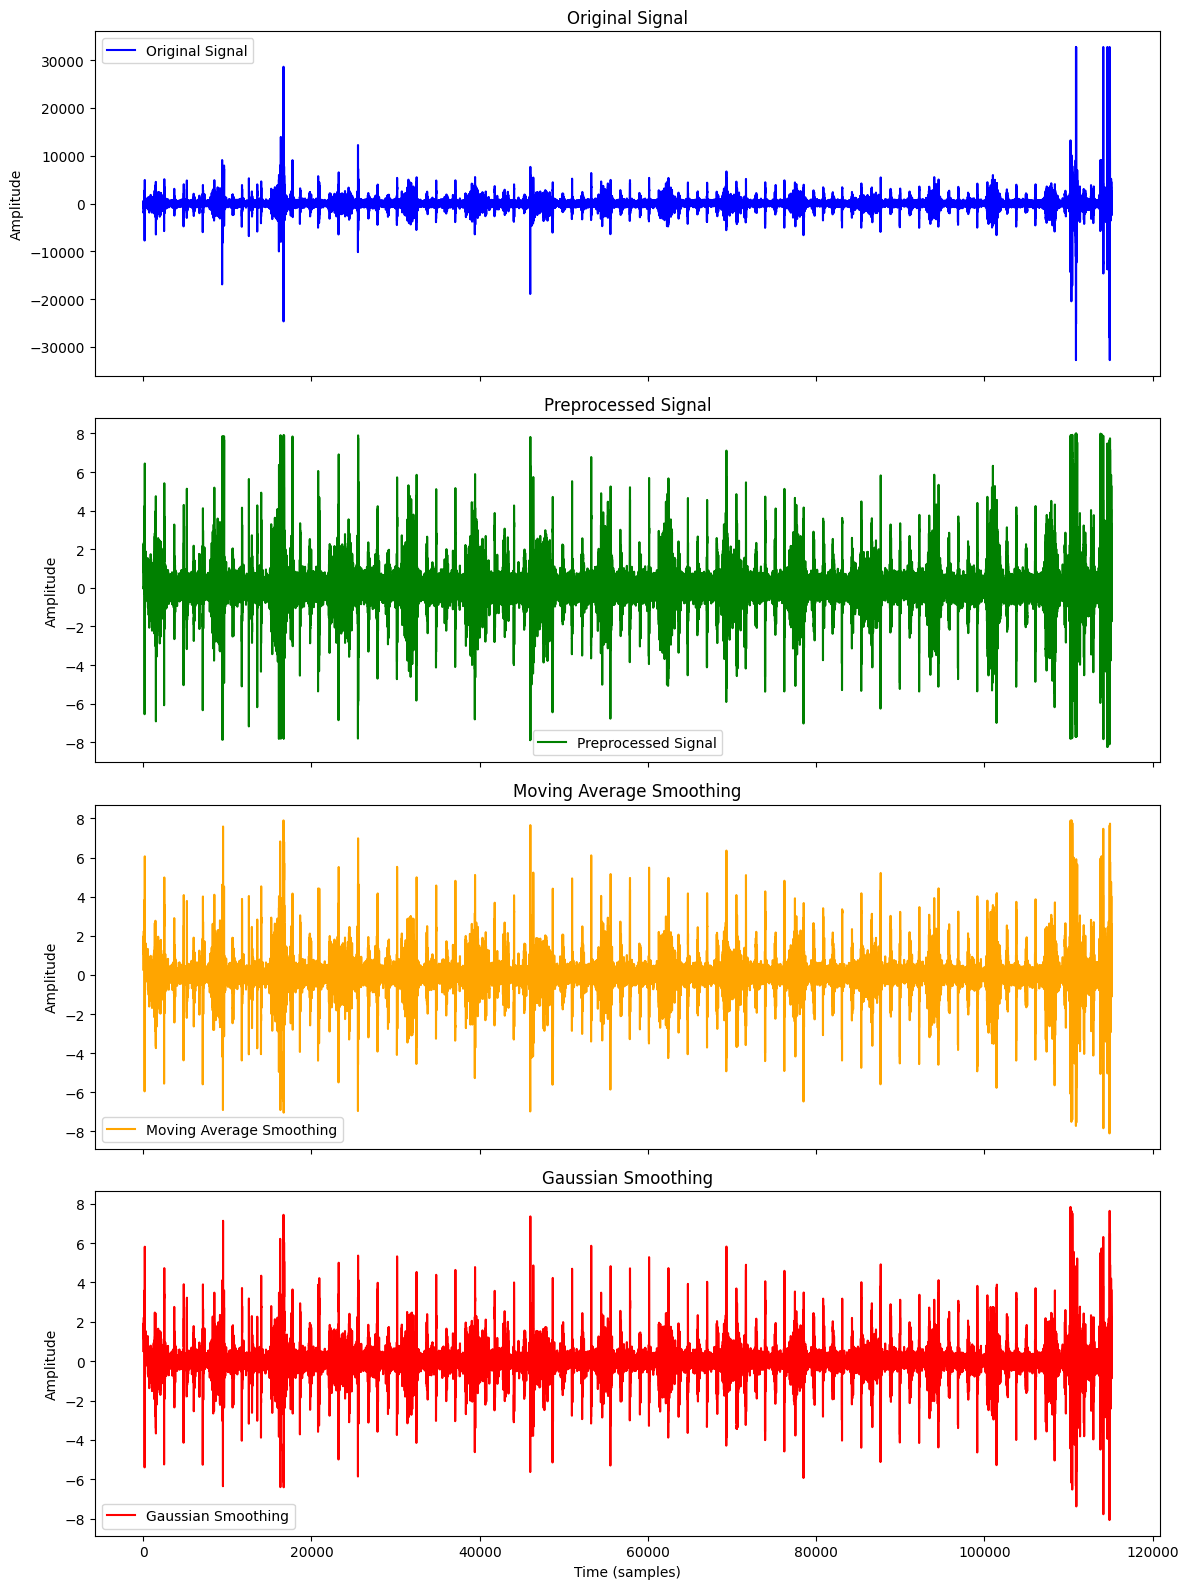

In [ ]:
# Plot the original and processed signals
fig, axs = plt.subplots(4, 1, figsize=(12, 16), sharex=True)
axs[0].plot(signal, label='Original Signal', color='b')
axs[0].set_title('Original Signal')
axs[0].set_ylabel('Amplitude')
axs[0].legend()
axs[1].plot(phs, label='Preprocessed Signal', color='g')
axs[1].set_title('Preprocessed Signal')
axs[1].set_ylabel('Amplitude')
axs[1].legend()
axs[2].plot(smoothed_signal_ma, label='Moving Average Smoothing', color='orange')
axs[2].set_title('Moving Average Smoothing')
axs[2].set_ylabel('Amplitude')
axs[2].legend()
axs[3].plot(smoothed_signal_gaussian, label='Gaussian Smoothing', color='r')
axs[3].set_title('Gaussian Smoothing')
axs[3].set_xlabel('Time (samples)')
axs[3].set_ylabel('Amplitude')
axs[3].legend()

plt.tight_layout()
plt.show()

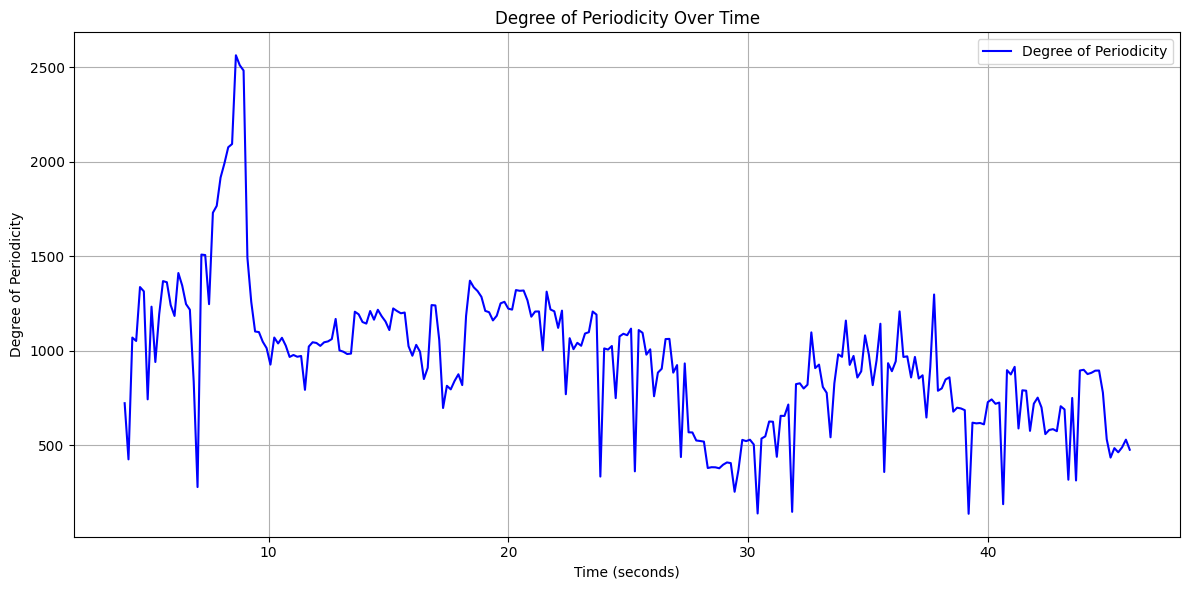

In [ ]:
# Plotting the degree of periodicity
plt.figure(figsize=(12, 6))
plt.plot(time_values, degree_peak_values, label='Degree of Periodicity', color='b')
plt.xlabel('Time (seconds)')
plt.ylabel('Degree of Periodicity')
plt.title('Degree of Periodicity Over Time')
plt.grid(True)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

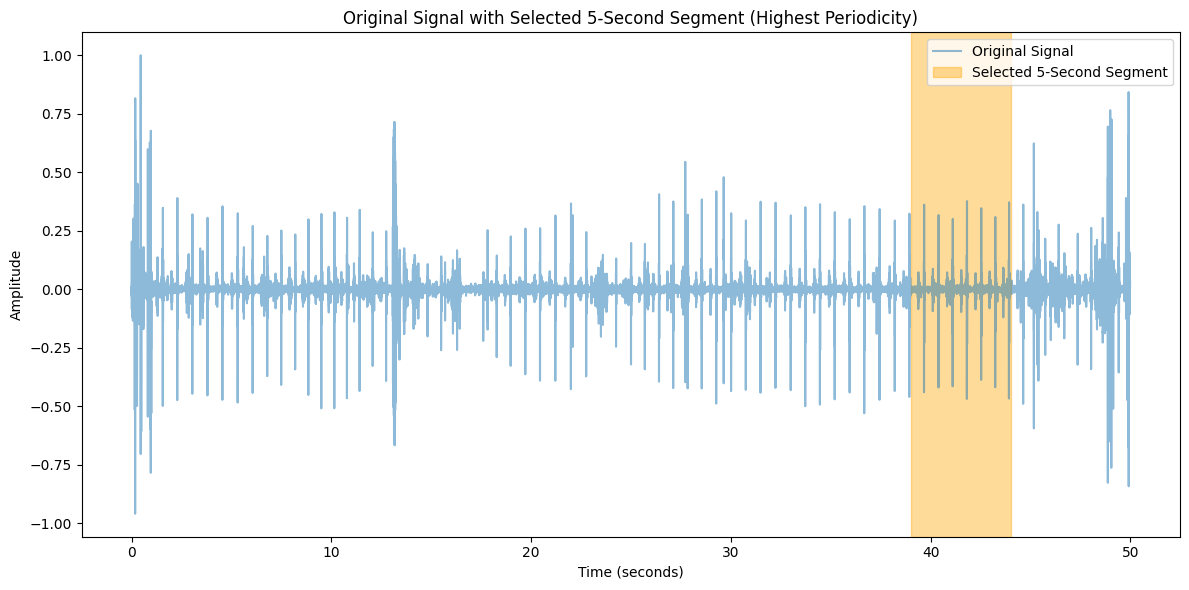

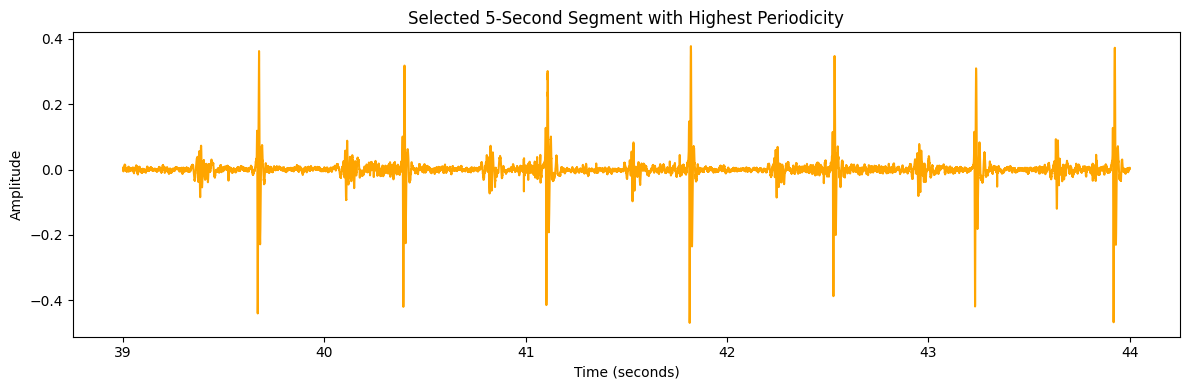

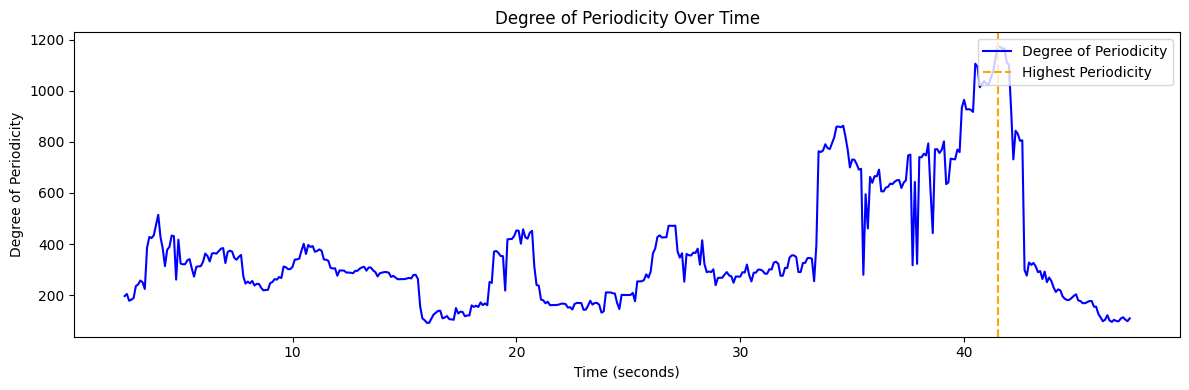

In [ ]:
import numpy as np
import soundfile as sf
from scipy.signal import hilbert, butter, filtfilt
import matplotlib.pyplot as plt

wav_file = '/content/drive/MyDrive/2024-2025/ELEC 594/Audio Dataset/training_data/50048_MV.wav'
signal, sample_rate = sf.read(wav_file)

# Function to remove spikes from a signal
def remove_spike(input_signal):
    R = 3
    dspike_signal = np.copy(input_signal)
    abs_signal = np.abs(input_signal)
    sort_abs = np.sort(abs_signal)[::-1]
    TH = np.mean(sort_abs[:int(len(input_signal) * 0.1)])
    ind_spike = np.where(abs_signal > R * TH)[0]

    if len(ind_spike) > 0:
        L_one_percent = int(len(input_signal) * 0.01)
        if len(ind_spike) > L_one_percent:
            ampi = np.argsort(abs_signal[ind_spike])[::-1]
            dspike_signal[ind_spike[ampi[:L_one_percent]]] = np.sign(input_signal[ind_spike[ampi[:L_one_percent]]]) * R * TH
        else:
            dspike_signal[ind_spike] = np.sign(input_signal[ind_spike]) * R * TH
    return dspike_signal

# Function for signal pre-processing
def pre_processing(input_signal, fs):
    input_signal = input_signal / np.std(input_signal)
    dspike_signal = remove_spike(input_signal)
    fc = 2
    b, a = butter(3, 2 * fc / fs, 'high')
    dwander = filtfilt(b, a, dspike_signal)
    output_signal = dwander / np.std(dwander)
    return output_signal

# Function to compute the degree of periodicity
def getDegree_cycle(rx, Min_cf, Max_cf, fs):
    sz = len(rx)
    M = int(2e2)
    g = np.zeros((sz, M), dtype=np.complex128)

    for m in range(M):
        if m == 0: continue
        kk = np.arange(-sz + 1, sz)
        ww = np.exp(-1j * 2 * np.pi * (Max_cf - Min_cf) * m / (M * fs)) ** (kk**2 / 2)
        x = np.abs(hilbert(rx)) ** 2
        x = np.sqrt(np.maximum(x - np.mean(x), 0))
        nn = np.arange(sz)
        aa = np.exp(1j * 2 * np.pi * Min_cf * m / fs) ** nn
        aa = aa * ww[:sz]
        y = x * aa
        g[:, m] = np.convolve(y, 1 / ww[:sz], mode='valid') * ww[M-1:M+sz-1]

    g_vector = np.abs(g).sum(axis=0)[:M]
    degree_peak = np.max(g_vector) / np.median(g_vector)
    return degree_peak

# Sliding window approach for periodicity detection
def getDegree_cycle_sliding_window(rx, Min_cf, Max_cf, fs, window_size, overlap):
    sz = len(rx)
    window_size = int(window_size * fs)
    step_size = int(window_size * (1 - overlap))

    degree_peak_values = []
    time_values = []
    start_indices = []

    for start in range(0, sz - window_size + 1, step_size):
        end = start + window_size
        windowed_signal = rx[start:end]
        degree_peak = getDegree_cycle(windowed_signal, Min_cf, Max_cf, fs)
        center_time = (start + end) / (2.0 * fs)

        degree_peak_values.append(degree_peak)
        time_values.append(center_time)
        start_indices.append(start)

    return degree_peak_values, time_values, start_indices

# Preprocess the signal
preprocessed_signal = pre_processing(signal, sample_rate)

# Sliding window analysis parameters
Min_cf = 0.0
Max_cf = 2.0
window_size = 5.0
overlap = 0.98

# Calculate the degree of periodicity
degree_peak_values, time_values, start_indices = getDegree_cycle_sliding_window(preprocessed_signal, Min_cf, Max_cf, sample_rate, window_size, overlap)

# Find the 5-second segment with the highest degree of periodicity
max_periodicity_index = np.argmax(degree_peak_values)
start_index = start_indices[max_periodicity_index]
end_index = start_index + int(window_size * sample_rate)

plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(signal)) / sample_rate, signal, label='Original Signal', alpha=0.5)
plt.axvspan(start_index / sample_rate, end_index / sample_rate, color='orange', alpha=0.4, label='Selected 5-Second Segment')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Original Signal with Selected 5-Second Segment (Highest Periodicity)')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 4))
plt.plot(np.arange(start_index, end_index) / sample_rate, signal[start_index:end_index], label='Selected 5-Second Segment', color='orange')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Selected 5-Second Segment with Highest Periodicity')
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 4))
plt.plot(time_values, degree_peak_values, label='Degree of Periodicity', color='b')
plt.axvline(time_values[max_periodicity_index], color='orange', linestyle='--', label='Highest Periodicity')
plt.xlabel('Time (seconds)')
plt.ylabel('Degree of Periodicity')
plt.title('Degree of Periodicity Over Time')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


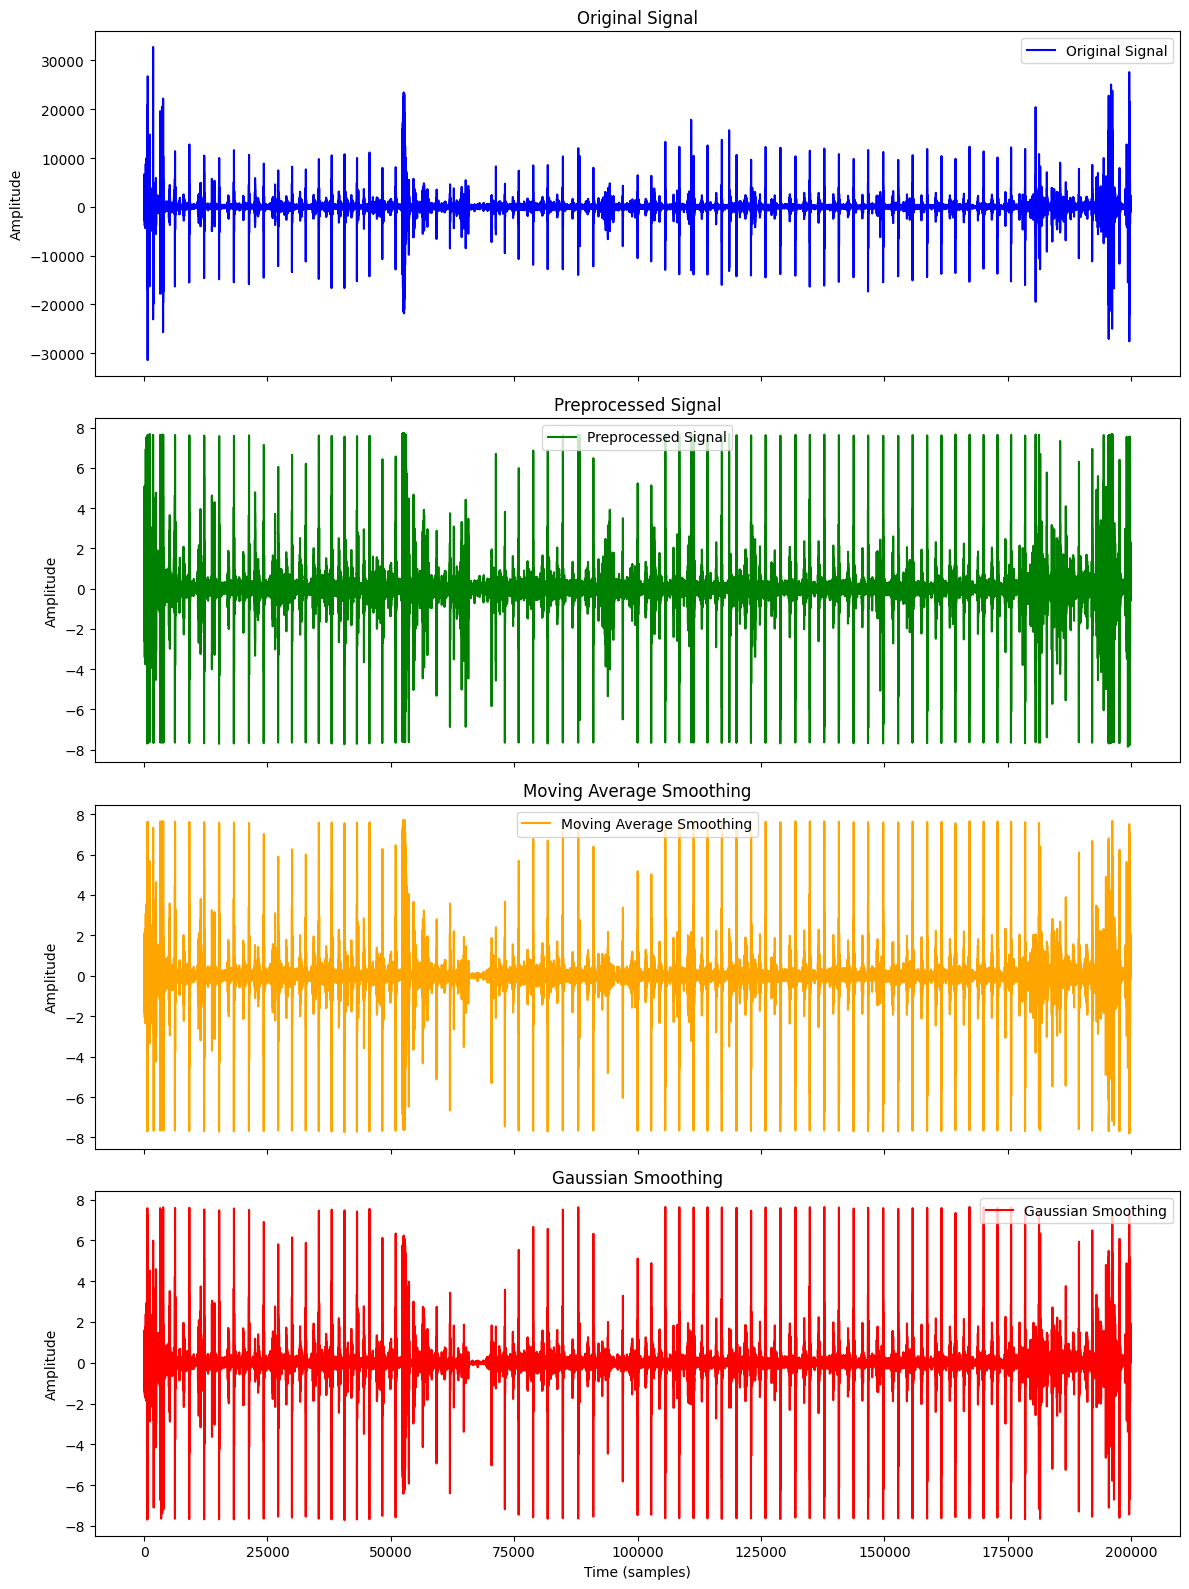

In [ ]:
fig, axs = plt.subplots(4, 1, figsize=(12, 16), sharex=True)

axs[0].plot(signal, label='Original Signal', color='b')
axs[0].set_title('Original Signal')
axs[0].set_ylabel('Amplitude')
axs[0].legend()

axs[1].plot(phs, label='Preprocessed Signal', color='g')
axs[1].set_title('Preprocessed Signal')
axs[1].set_ylabel('Amplitude')
axs[1].legend()

axs[2].plot(smoothed_signal_ma, label='Moving Average Smoothing', color='orange')
axs[2].set_title('Moving Average Smoothing')
axs[2].set_ylabel('Amplitude')
axs[2].legend()

axs[3].plot(smoothed_signal_gaussian, label='Gaussian Smoothing', color='r')
axs[3].set_title('Gaussian Smoothing')
axs[3].set_xlabel('Time (samples)')
axs[3].set_ylabel('Amplitude')
axs[3].legend()

plt.tight_layout()
plt.show()

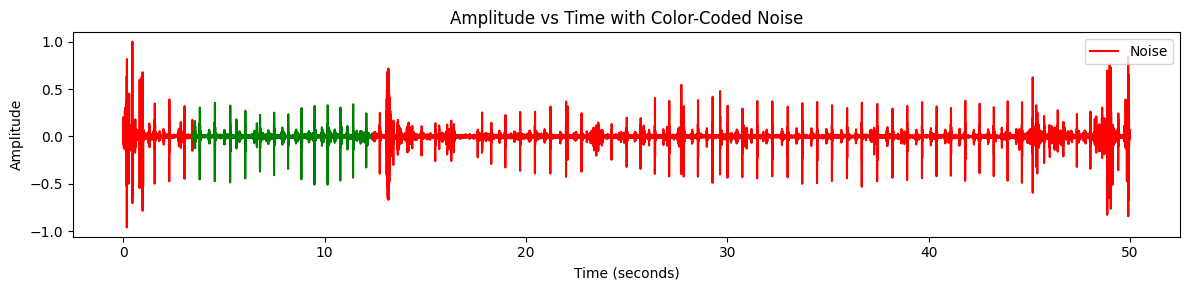

In [ ]:
import numpy as np
import soundfile as sf
from scipy.io import wavfile
import matplotlib.pyplot as plt

wav_file = '/content/drive/MyDrive/2024-2025/ELEC 594/Audio Dataset/training_data/50048_MV.wav'  # Replace with actual path
signal, sample_rate = sf.read(wav_file)

tsv_file_path = '/content/drive/MyDrive/2024-2025/ELEC 594/Audio Dataset/training_data/50048_MV.tsv'  # Replace with actual path
data = np.genfromtxt(tsv_file_path, delimiter='\t')

start_time = data[:, 0]
end_time = data[:, 1]
noise_column = data[:, 2]
plt.figure(figsize=(12, 3))

for i in range(len(start_time)):
    start_index = int(start_time[i] * sample_rate)
    end_index = int(end_time[i] * sample_rate)
    if noise_column[i] == 0:
        plt.plot(np.arange(start_index, end_index) / sample_rate, signal[start_index:end_index], color='red', label='Noise' if i == 0 else "")
    else:
        plt.plot(np.arange(start_index, end_index) / sample_rate, signal[start_index:end_index], color='green', label='Clean' if i == 0 else "")

plt.title('Amplitude vs Time with Color-Coded Noise')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


In [ ]:
import pandas
data=pandas.read_csv('/content/drive/MyDrive/2024-2025/ELEC 594/Audio Dataset/training_data/50048_MV.tsv', sep='\t')
data

,0,3.48025,0.1
0,3.480250,3.600250,1
1,3.600250,3.780250,2
2,3.780250,3.880250,3
3,3.880250,4.240250,4
4,4.240250,4.360250,1
5,4.360250,4.520250,2
6,4.520250,4.640250,3
7,4.640250,5.000250,4
8,5.000250,5.120250,1
9,5.120250,5.280250,2
